<a href="https://colab.research.google.com/github/barryhokeeffe/ST6090-Thesis/blob/main/SHAP_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# imports and dependencies
!pip install shap
import shap
import pandas as pd

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# dataset
url = 'https://raw.githubusercontent.com/barryhokeeffe/ST6090-Thesis/main/wine.csv'
wine = pd.read_csv(url)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,3.8,0.310,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,1
1,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,1
2,4.2,0.170,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,1
3,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,0
4,4.4,0.460,0.10,2.8,0.024,31.0,111.0,0.98816,3.48,0.34,13.1,1


In [6]:
# attributes/target split
x = wine.drop('quality', axis=1)
y = wine['quality']

In [7]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# XGBoost classifier
model = XGBClassifier(random_state=42)
model.fit(x_train, y_train)

In [9]:
# accuracy
score = model.score(x_test, y_test)
score

0.8295918367346938

In [10]:
# create explainer and calculate shap values 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [19]:
# explain single prediction - bad wine
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[3, :], x.iloc[3, :])

In [20]:
# explain single prediction - good wine
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], x.iloc[0,:])

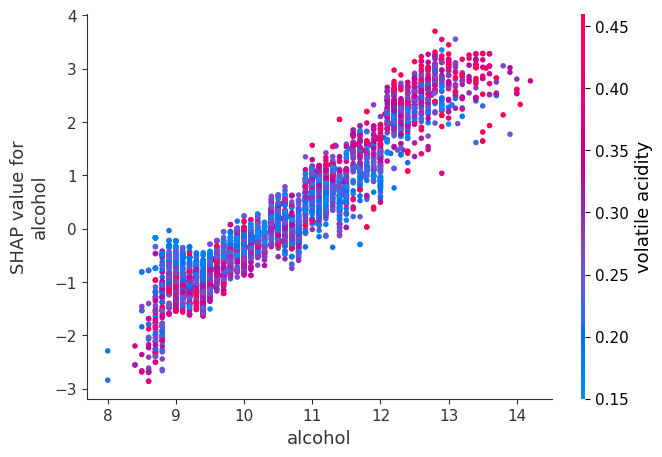

In [21]:
# explain single feaure - alcohol
shap.initjs()
shap.dependence_plot('alcohol', shap_values, x)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


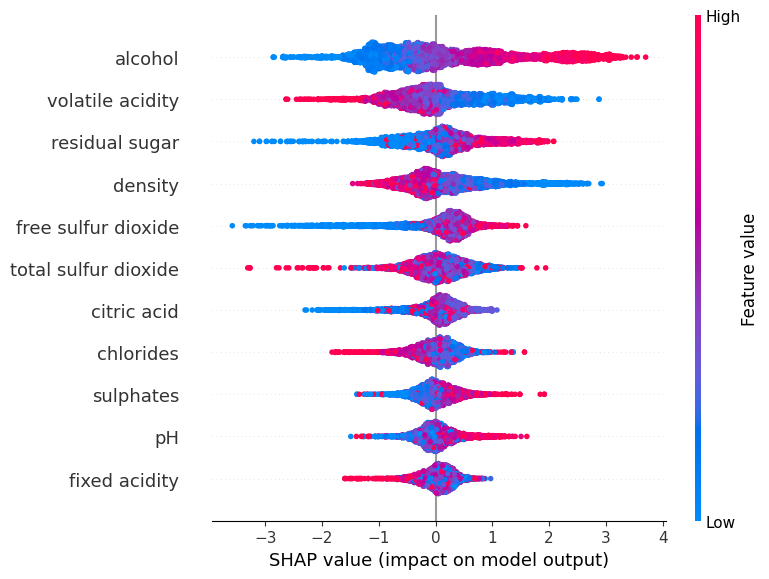

In [15]:
# explain entire dataset
shap.initjs()
shap.summary_plot(shap_values, x)